# Context
Penjualan rumah di Chennai, India

# Problem Statement
Kesulitan bagi seorang pemula untuk mengetahui harga wajar dari suatu rumah di Chennai. 

# Goals
membuat model prediksi harga jual yang akan membantu pelanggan Real Estate menemukan harga yang wajar untuk rumah mereka dan juga membantu penjual rumah memahami faktor apa yang menghasilkan lebih banyak uang dari suatu rumah.

# Data Understanding


- Informasi kolom :
  - PRT_ID : Nomor identitas rumah (drop)
  - AREA : Lokasi perumahan
  - INT_SQFT : Luas rumah 
  - DATE_SALE : Tanggal penjualan
  - DIST_MAINROAD : Jarak rumah dari jalan raya
  - N_BEDROOM : Jumlah kamar tidur
  - N_BATHROOM : Jumlah kamar mandi
  - N_ROOM : Jumlah ruangan
  - SALE_COND : Kondisi Penjualan :
    - Abnormal : Kondisi penjualan dengan harga tidak sesuai pasar
    - Family : Kondisi penjualan rumah dengan kondisi bagus
    - Partial : kepemilikan bersama rumah (seperti saham), aturan India
    - Adjland : Harga sesuai kesepakatan negosiasi
  - PARK_FACIL : Fasilitas parkir
  - DATE_BULD : Tanggal pembangunan rumah
  - BUILDTYPE : Tujuan pembangunan rumah:
      - Komersial
      - non komersial
  - UTILITY_AVAIL : Fasilitas yang tersedia
      - All pub : termasuk listrik, gas, air, septic tank
      - NoSewr : ga ada septic tank, cuma ada listrik, gas, air
      - NoSeWA : ga ada septic tank dan air, cuma ada listrik dan gas
  - STREET : Kondisi jalan diluar rumah :
    - Paved : jalan aspal
    - Gravel : jalan krikil
    - No Access : tidak ada akses jalan
  - MZZONE :
      - RL : Residential Low Density
      - RH : Residential High Density
      - RM : Residential Medium Density
      - C  : Commercial 
      - A  : Agriculture
      - I  : Industrial
  - QS_ROOMS :
  - QS_BATHROOM :
  - QS_BEDROOM :
  - QS_OVERALL :
  - REG_FEE : Biaya administrasi setelah penjualan (drop)
  - COMMIS : Komisi setelah penjualan (dumlah
  - SALES_PRICE : Harga penjualan

# Mengimport library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, median_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("Chennai houseing sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
Dataset = []
for i in df.columns :
    Dataset.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum()/len(df))*100,2),
        df[i].nunique()
    ])
pd.DataFrame(data = Dataset,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique'
            ])

,Features,DataType,Null,NullPercentage,Unique
0,PRT_ID,object,0,0.00,7109
1,AREA,object,0,0.00,17
2,INT_SQFT,int64,0,0.00,1699
3,DATE_SALE,object,0,0.00,2798
4,DIST_MAINROAD,int64,0,0.00,201
5,N_BEDROOM,float64,1,0.01,4
6,N_BATHROOM,float64,5,0.07,2
7,N_ROOM,int64,0,0.00,5
8,SALE_COND,object,0,0.00,9
9,PARK_FACIL,object,0,0.00,3


# Data Wrangling

In [4]:
df.duplicated().any()

False

In [5]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
df.dropna(inplace=True) #menghapus kolom yang kosong

In [7]:
df.columns = df.columns.str.lower() #mengubah nama kolom menjadi huruf kecil semua

In [8]:
def area_edit (x):
    if x == 'Chrompet':
        return 'chrompet'
    elif x == 'Karapakkam':
        return 'karapakkam'
    elif x == 'KK Nagar':
        return 'kknagar'
    elif x == 'Velachery':
        return 'velachery'
    elif x == 'Karapakkam':
        return 'karapakkam'
    elif x == 'Anna Nagar':
        return 'anna nagar'
    elif x == 'Adyar':
        return 'adyar'
    elif x == 'T Nagar':
        return 'tnagar'
    elif x == 'Chrompt':
        return 'chrompet'
    elif x == 'Chrmpet':
        return 'chrompet'
    elif x == 'TNagar':
        return 'tnagar'
    elif x == 'Chormpet':
        return 'chrompet'
    elif x == 'Karapakam':
        return 'karapakkam'
    elif x == 'Ana Nagar':
        return 'anna nagar'
    elif x == 'Velchery':
        return 'velachery'
    elif x == 'Ann Nagar':
        return 'anna nagar'
    elif x == 'Adyr':
        return 'adyar'
    elif x == 'KKNagar':
        return 'kknagar'


In [9]:
df['area']=df['area'].apply(area_edit) ## mengedit isi kolom area yang tertulis lrbih dari satu

In [10]:
df['area'].value_counts()

chrompet      1691
karapakkam    1359
kknagar        990
velachery      975
anna nagar     777
adyar          769
tnagar         495
Name: area, dtype: int64

In [11]:
def buildtype_edit (x):
    if x == 'House':
        return 'non-comercial'
    elif x == 'Commercial':
        return 'comercial'
    elif x == 'Other':
        return 'non-comercial'
    elif x == 'Comercial':
        return 'comercial'
    elif x == 'Others':
        return 'non-comercial'

In [12]:
df['buildtype'] = df['buildtype'].apply(buildtype_edit) #mengedit isi kolom buildtype yang tertulis lebih dari satu

In [13]:
df['buildtype'].value_counts()

non-comercial    4745
comercial        2311
Name: buildtype, dtype: int64

In [14]:
def sale_cond_edit (x):
    if x == 'AdjLand':
        return 'adjland'
    elif x == 'Normal Sale':
        return 'normal sale'
    elif x == 'AbNormal':
        return 'abnormal'
    elif x == 'Family':
        return 'family'
    elif x == 'Adj Land':
        return 'adjland'
    elif x == 'Ab Normal':
        return 'abnormal'
    elif x == 'Partiall':
        return 'partial'
    elif x == 'PartiaLl':
        return 'partial'
    elif x == 'Partial':
        return 'partial'

In [15]:
df['sale_cond'] = df['sale_cond'].apply(sale_cond_edit) ##mengedit isi kolom sale_cond yang tertulis lebih dari satu

In [16]:
def park_facil_edit (x):
    if x == 'Yes':
        return 'yes'
    elif x == 'No':
        return 'no'
    elif x == 'Noo':
        return 'no'

In [17]:
df['park_facil'] = df['park_facil'].apply(park_facil_edit) # mengedit isi kolom park facil yang tertulis lebih dari satu

In [18]:
df['park_facil'].value_counts()

yes    3557
no     3499
Name: park_facil, dtype: int64

In [19]:
def utility_avail_edit (x):
    if x == 'AllPub':
        return 'allpub'
    elif x == 'NoSeWa':
        return 'nosewa'
    elif x == 'ELO':
        return 'elo'
    elif x == 'All Pub':
        return 'allpub'
    else:
        return 'nosewa'

In [20]:
df['utility_avail'] = df['utility_avail'].apply(utility_avail_edit) # mengedit isi kolom utility yang tertulis lebih dari satu

In [21]:
df['utility_avail'].value_counts()

nosewa    3672
allpub    1875
elo       1509
Name: utility_avail, dtype: int64

 ######## Merubah tipe data n_bedroom dan n_bathroom : Perubahan tipe data ini dilakukan karena n_bedroom dan n_bathroom tidak memiliki angka decimal sehingga cukup menggunakan tipe data integer


In [22]:
df['n_bathroom'] = df['n_bathroom'].astype(int)
df['n_bedroom'] = df['n_bedroom'].astype(int)

In [23]:
def street_edit (x):
    if x == 'Paved':
        return 'paved'
    elif x == 'Gravel':
        return 'gravel'
    elif x == 'No Access':
        return 'no access'
    elif x == 'Pavd':
        return 'pavd'
    elif x == 'NoAccess':
        return 'no access'

In [24]:
df['street'] = df['street'].apply(street_edit) # mengedit isi kolom street yang tertulis lebih dari satu

In [25]:
# membetulkan kolom tanggal
df['date_sale'] = pd.to_datetime(df['date_sale'], format='%d-%m-%Y')
df['date_build'] = pd.to_datetime(df['date_build'], format='%d-%m-%Y')

In [26]:
df.drop(columns=['prt_id', 'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall'],inplace=True) # drop kolom yang tidak diperlukan

# Feature Engineering
Mempersiapkan data untuk masuk ke dalam machine learning

In [27]:
df['total_harga'] = df['sales_price'] + df['commis'] + df['reg_fee'] #membuat kolom total harga sebagai kolom target

In [28]:
df.drop(columns=['reg_fee', 'commis', 'sales_price'], inplace=True) #menghapus kolom yang sudah dijadikan kolom target

<AxesSubplot:>

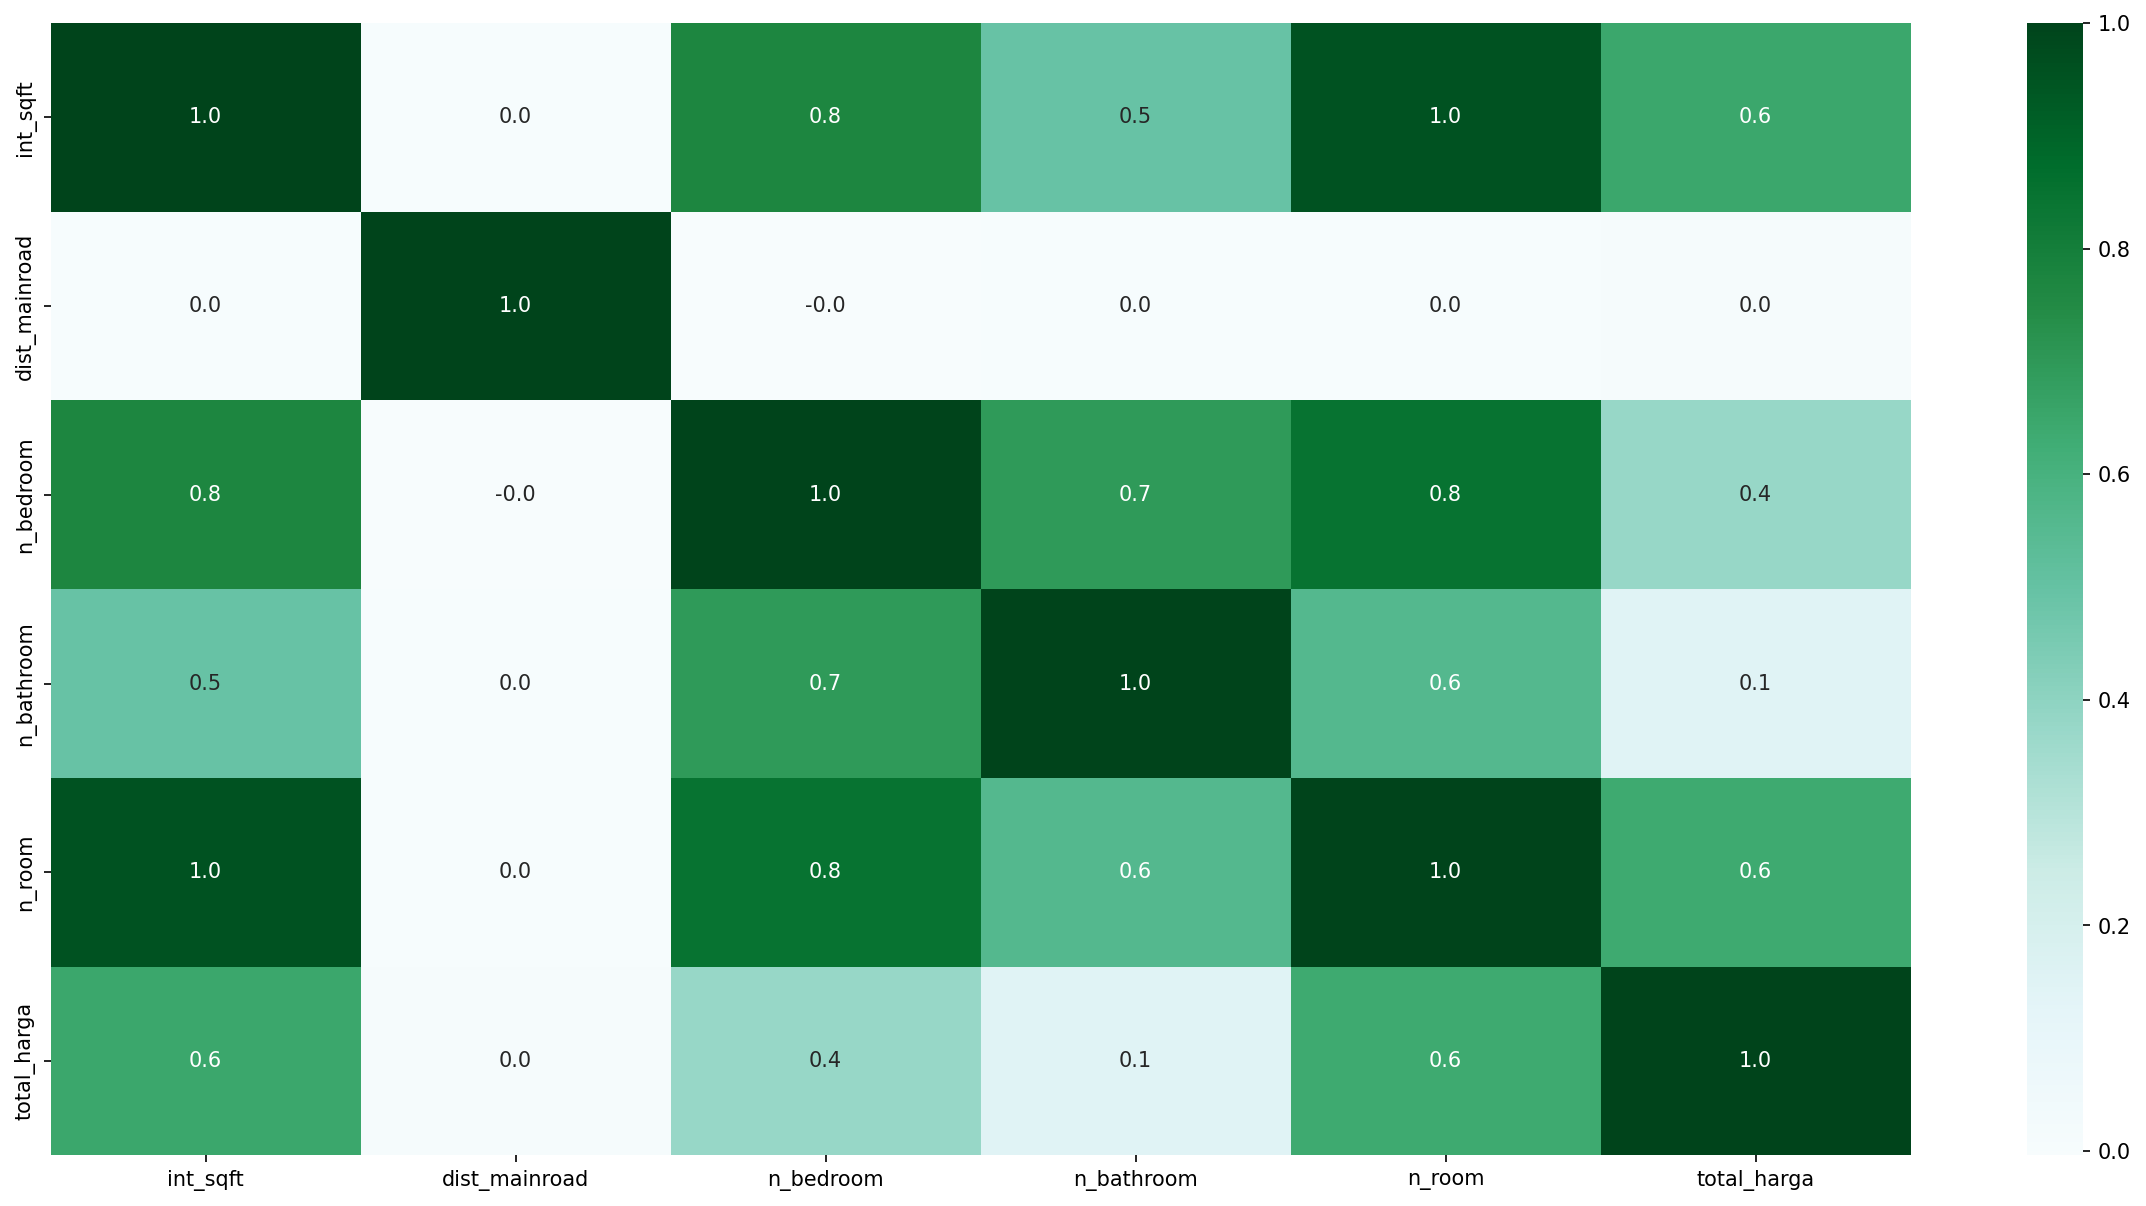

In [29]:
plt.figure(figsize=(20,10), dpi=150)
sns.heatmap(df.corr(method='spearman'),cbar=True, cmap='BuGn',annot=True,fmt='.1f')

In [30]:
df.drop(columns=['dist_mainroad', 'n_bathroom'], inplace = True) #menghapus kolom yang memiliki korelasi rendah

In [31]:
df.select_dtypes('object').head(5) # menampilkan kolom objek yang tidak termasuk ke dalam korelasi

,area,sale_cond,park_facil,buildtype,utility_avail,street,mzzone
0,karapakkam,abnormal,yes,comercial,allpub,paved,A
1,anna nagar,abnormal,no,comercial,allpub,gravel,RH
2,adyar,abnormal,yes,comercial,elo,gravel,RL
3,velachery,family,no,non-comercial,nosewa,paved,I
4,karapakkam,abnormal,yes,non-comercial,allpub,gravel,C


Mengedit isi kolom sale_cond untuk dijadikan label encoding
- Abnormal : Kondisi penjualan dengan harga tidak sesuai pasar
- Family : Kondisi penjualan rumah dengan kondisi bagus
- Partial : kepemilikan bersama rumah (seperti saham), aturan India
- Adjland : Harga sesuai kesepakatan negosiasi
- Normal Sale : harga normal

In [32]:
def sale_cond_edit(x) :
    if x == 'adjland':
        return 2
    elif x == 'partial':
        return 1
    elif x == 'normal sale':
        return 3
    elif x == 'abnormal' :
        return 0
    elif x == 'family' :
        return 4

In [33]:
df['sale_cond'] = df['sale_cond'].apply(sale_cond_edit)

In [34]:
df = pd.get_dummies(df, columns=['area', 'mzzone'])

Mengedit isi kolom street untuk dijadikan label encoding
- Paved : jalan aspal
- Gravel : jalan krikil
- No Access : tidak ada akses jalan

In [35]:
def street_edit(x):
    if x == 'paved':
        return 2
    elif x == 'gravel':
        return 1
    else :
        return 0
    

In [36]:
df['street'] = df['street'].apply(street_edit)

Mengedit isi kolom utility avail untuk dijadikan label encoding
- All pub : termasuk listrik, gas, air, septic tank
- NoSewr : ga ada septic tank, cuma ada listrik, gas, air
- NoSeWA : ga ada septic tank dan air, cuma ada listrik dan gas
- Elo : hanya ada listrik

In [37]:
def utility(x):
    if x == 'allpub':
        return 3
    elif x== 'nosewr':
        return 2
    elif x == 'nosewa':
        return 1
    else :
        return 0

Mengedit isi kolom buildtype dan park facil sekaligus untuk dijadikan binary encoding

In [38]:
df['utility_avail']=df['utility_avail'].apply(utility)

In [39]:
def buildtype_parkfacil(x):
    if x == 'comercial':
        return 1
    elif x == 'non-comercial':
        return 0
    elif x == 'yes':
        return 1
    elif x == 'no':
        return 0

In [40]:
df['buildtype'] = df['buildtype'].apply(buildtype_parkfacil)

In [41]:
df['park_facil'] = df['park_facil'].apply(buildtype_parkfacil)

<AxesSubplot:>

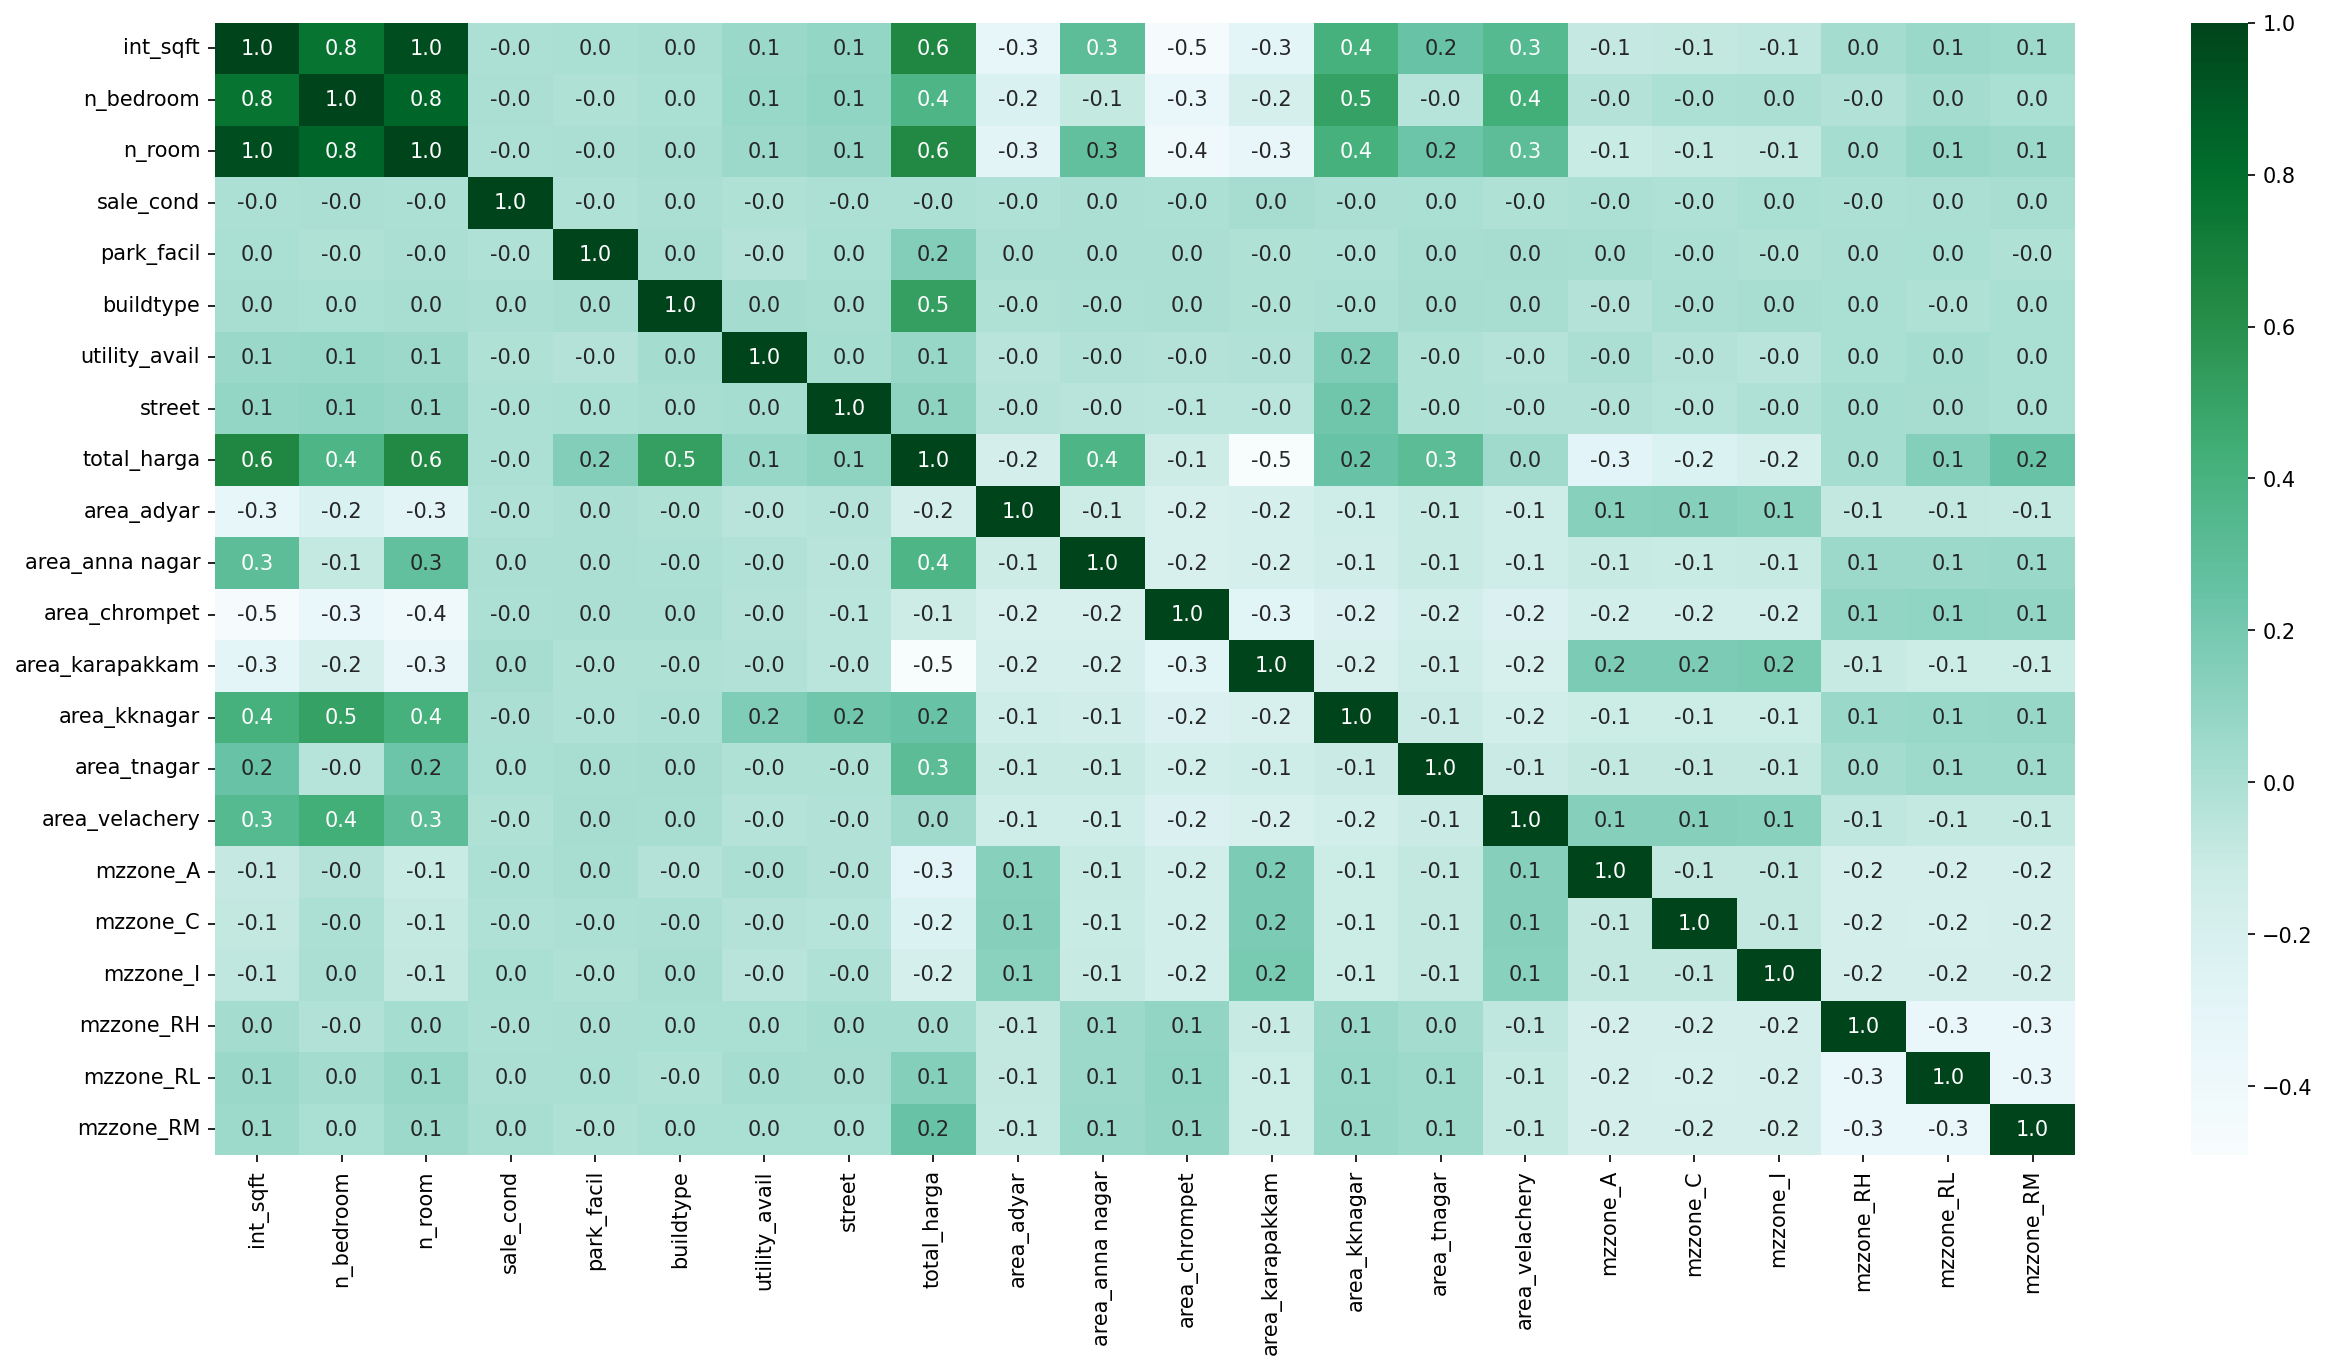

In [42]:
plt.figure(figsize=(20,10), dpi=150)
sns.heatmap(df.corr(method='spearman'),cbar=True, cmap='BuGn',annot=True,fmt='.1f')

In [43]:
df.drop(columns=['date_sale', 'date_build'], inplace=True)

In [44]:
df['n_bedroom']=df['n_bedroom'].astype('int64')

# Machine Learning

In [45]:
X = df.drop(columns=['total_harga'],axis=1)
y = df['total_harga']

In [46]:
Model = LinearRegression()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 8)

In [48]:
Model.fit(X_train, y_train)

LinearRegression()

In [49]:
pred_train = Model.predict(X_train)
pred_test = Model.predict(X_test)

In [50]:
r2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)
MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)

print("Hasil Evaluation Matrix untuk Data Training")
print("=" * 50)
print("Nilai R Squared : ", r2_train.round(2))
print("Nilai MAE : ", MAE_train.round(2))
print("Nilai MSE : ", MSE_train.round(2))
print("Nilai RMSE : ", RMSE_train.round(2))

Hasil Evaluation Matrix untuk Data Training
Nilai R Squared :  0.93
Nilai MAE :  798745.44
Nilai MSE :  1034323356276.43
Nilai RMSE :  1017016.89


In [51]:
r2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)
MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)

print("Hasil Evaluation Matrix untuk Data Test")
print("=" * 50)
print("Nilai R Squared : ", r2_test.round(2))
print("Nilai MAE : ", MAE_test.round(2))
print("Nilai MSE : ", MSE_test.round(2))
print("Nilai RMSE : ", RMSE_test.round(2))

Hasil Evaluation Matrix untuk Data Test
Nilai R Squared :  0.94
Nilai MAE :  799526.57
Nilai MSE :  1027064932239.22
Nilai RMSE :  1013442.12


In [52]:
data = {
    "Training LR" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "Testing LR" : [r2_test, MAE_test, MSE_test, RMSE_test]
}
hasil = pd.DataFrame(data, index=["R Squared", "MAE", "MSE", "RMSE"])
hasil

,Training LR,Testing LR
R Squared,9.327270e-01,9.382844e-01
MAE,7.987454e+05,7.995266e+05
MSE,1.034323e+12,1.027065e+12
RMSE,1.017017e+06,1.013442e+06


# Improvement Machine Learning Polinomial Feature

In [53]:
Poli = PolynomialFeatures(degree=2, include_bias=False, interaction_only = True)
Poli = Poli.fit(X_train)

X_trainPoli = Poli.transform(X_train)
X_testPoli = Poli.transform(X_test)

df_XtrainPoli = pd.DataFrame(X_trainPoli)
df_XtestPoli = pd.DataFrame(X_testPoli)

Model.fit(df_XtrainPoli, y_train) 

PF_train = Model.predict(df_XtrainPoli)
PF_test = Model.predict(df_XtestPoli)

In [54]:
r2_PF = r2_score(y_train, PF_train)
MAE_PF = mean_absolute_error(y_train, PF_train)
MSE_PF = mean_squared_error(y_train, PF_train)
RMSE_PF = np.sqrt(MSE_PF)

print("Hasil Evaluation Matrix untuk Data Training Polinomial")
print("=" * 50)
print("Nilai R Squared : ", r2_PF.round(2))
print("Nilai MAE : ", MAE_PF.round(2))
print("Nilai MSE : ", MSE_PF.round(2))
print("Nilai RMSE : ", RMSE_PF.round(2))

Hasil Evaluation Matrix untuk Data Training Polinomial
Nilai R Squared :  0.98
Nilai MAE :  475295.17
Nilai MSE :  343139429006.35
Nilai RMSE :  585781.04


In [55]:
r2_PF_test = r2_score(y_test, PF_test)
MAE_PF_test = mean_absolute_error(y_test, PF_test)
MSE_PF_test = mean_squared_error(y_test, PF_test)
RMSE_PF_test = np.sqrt(MSE_PF_test)


print("Hasil Evaluation Matrix untuk Data Testing Polinomial")
print("=" * 50)
print("Nilai R Squared : ", r2_PF_test.round(2))
print("Nilai MAE : ", MAE_PF_test.round(2))
print("Nilai MSE : ", MSE_PF_test.round(2))
print("Nilai RMSE : ", RMSE_PF_test.round(2))

Hasil Evaluation Matrix untuk Data Testing Polinomial
Nilai R Squared :  0.98
Nilai MAE :  494555.21
Nilai MSE :  365667392083.93
Nilai RMSE :  604704.38


In [56]:
data = {
    "Training LR" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "Testing LR" : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Polynomial Training' : [r2_PF, MAE_PF, MSE_PF, RMSE_PF],
    'Polynomial Testing' : [r2_PF_test, MAE_PF_test, MSE_PF_test, RMSE_PF_test]
}
hasil = pd.DataFrame(data, index=["R Squared", "MAE", "MSE", "RMSE"])
hasil

,Training LR,Testing LR,Polynomial Training,Polynomial Testing
R Squared,9.327270e-01,9.382844e-01,9.776820e-01,9.780273e-01
MAE,7.987454e+05,7.995266e+05,4.752952e+05,4.945552e+05
MSE,1.034323e+12,1.027065e+12,3.431394e+11,3.656674e+11
RMSE,1.017017e+06,1.013442e+06,5.857810e+05,6.047044e+05


# Regularization

In [57]:
ridge = Ridge()
lasso = Lasso()
enet = ElasticNet()

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
enet.fit(X_train, y_train)

R_train = ridge.predict(X_train)
L_train = lasso.predict(X_train)
E_train = enet.predict(X_train)

R_test = ridge.predict(X_test)
L_test = lasso.predict(X_test)
E_test = enet.predict(X_test)

In [58]:
r2_train_R = r2_score(y_train, R_train)
mae_train_R = mean_absolute_error(y_train, R_train)
mse_train_R = mean_squared_error(y_train, R_train)
rmse_train_R = np.sqrt(mse_train_R) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training Ridge')
print('='*50)
print('r2_train_R :', r2_train_R.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_R:', mae_train_R.round(2))
print('mse_train_R:', mse_train_R.round(2))
print('rmse_train_R :', rmse_train_R.round(2))

Evaluation Matrix untuk data training Ridge
r2_train_R : 0.93
mae_train_R: 798584.85
mse_train_R: 1034339843145.07
rmse_train_R : 1017025.0


In [59]:
r2_test_R = r2_score(y_test, R_test)
mae_test_R = mean_absolute_error(y_test, R_test)
mse_test_R = mean_squared_error(y_test, R_test)
rmse_test_R = np.sqrt(mse_test_R) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing Ridge')
print('='*50)
print('r2_test_R :', r2_test_R.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_R:', mae_test_R.round(2))
print('mse_test_R:', mse_test_R.round(2))
print('rmse_test_R :', rmse_test_R.round(2))

Evaluation Matrix untuk data testing Ridge
r2_test_R : 0.94
mae_test_R: 799564.11
mse_test_R: 1027711818782.26
rmse_test_R : 1013761.22


In [60]:
r2_train_L = r2_score(y_train, L_train)
mae_train_L = mean_absolute_error(y_train, L_train)
mse_train_L = mean_squared_error(y_train, L_train)
rmse_train_L = np.sqrt(mse_train_L) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training Lasso')
print('='*50)
print('r2_train_L :', r2_train_L.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_L:', mae_train_L.round(2))
print('mse_train_L:', mse_train_L.round(2))
print('rmse_train_L :', rmse_train_L.round(2))

Evaluation Matrix untuk data training Lasso
r2_train_L : 0.93
mae_train_L: 798744.99
mse_train_L: 1034323356451.42
rmse_train_L : 1017016.89


In [61]:
r2_test_L = r2_score(y_test, L_test)
mae_test_L = mean_absolute_error(y_test, L_test)
mse_test_L = mean_squared_error(y_test, L_test)
rmse_test_L = np.sqrt(mse_test_L) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing lasso')
print('='*50)
print('r2_test_L :', r2_test_L.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_L:', mae_test_L.round(2))
print('mse_test_L:', mse_test_L.round(2))
print('rmse_test_L :', rmse_test_L.round(2))

Evaluation Matrix untuk data testing lasso
r2_test_L : 0.94
mae_test_L: 799526.8
mse_test_L: 1027066886193.98
rmse_test_L : 1013443.08


In [62]:
r2_train_E = r2_score(y_train, E_train)
mae_train_E = mean_absolute_error(y_train, E_train)
mse_train_E = mean_squared_error(y_train, E_train)
rmse_train_E = np.sqrt(mse_train_E) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training Elastic Net')
print('='*50)
print('r2_train_E :', r2_train_E.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_E:', mae_train_E.round(2))
print('mse_train_E:', mse_train_E.round(2))
print('rmse_train_E :', rmse_train_E.round(2))

Evaluation Matrix untuk data training Elastic Net
r2_train_E : 0.67
mae_train_E: 1705072.53
mse_train_E: 5056205455593.75
rmse_train_E : 2248600.78


In [63]:
r2_test_E = r2_score(y_test, E_test)
mae_test_E = mean_absolute_error(y_test, E_test)
mse_test_E = mean_squared_error(y_test, E_test)
rmse_test_E = np.sqrt(mse_test_E) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing Elastic Net')
print('='*50)
print('r2_test_E :', r2_test_E.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_E:', mae_test_E.round(2))
print('mse_test_E:', mse_test_E.round(2))
print('rmse_test_E :', rmse_test_E.round(2))

Evaluation Matrix untuk data testing Elastic Net
r2_test_E : 0.67
mae_test_E: 1754268.58
mse_test_E: 5445251083860.2
rmse_test_E : 2333506.18


In [64]:
data = {
    "Training LR" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "Testing LR" : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Polynomial Training' : [r2_PF, MAE_PF, MSE_PF, RMSE_PF],
    'Polynomial Testing' : [r2_PF_test, MAE_PF_test, MSE_PF_test, RMSE_PF_test],
    'Ridge Training' : [r2_train_R, mae_train_R, mse_train_R, rmse_train_R],
    'Ridge Testing' : [r2_test_R, mae_test_R, mse_test_R, rmse_test_R],
    'Lasso Training' : [r2_train_L, mae_train_L, mse_train_L, rmse_train_L],
    'Lasso Testing' : [r2_test_L, mae_test_L, mse_test_L, rmse_test_L],
    'Elastic Net Training' : [r2_train_E, mae_train_E, mse_train_E, rmse_train_E],
    'Elastic Net Testing' : [r2_test_E, mae_test_E, mse_test_E, rmse_test_E]
}
hasil = pd.DataFrame(data, index=["R Squared", "MAE", "MSE", "RMSE"]).T
hasil

,R Squared,MAE,MSE,RMSE
Training LR,0.932727,7.987454e+05,1.034323e+12,1.017017e+06
Testing LR,0.938284,7.995266e+05,1.027065e+12,1.013442e+06
Polynomial Training,0.977682,4.752952e+05,3.431394e+11,5.857810e+05
Polynomial Testing,0.978027,4.945552e+05,3.656674e+11,6.047044e+05
Ridge Training,0.932726,7.985848e+05,1.034340e+12,1.017025e+06
Ridge Testing,0.938246,7.995641e+05,1.027712e+12,1.013761e+06
Lasso Training,0.932727,7.987450e+05,1.034323e+12,1.017017e+06
Lasso Testing,0.938284,7.995268e+05,1.027067e+12,1.013443e+06
Elastic Net Training,0.671142,1.705073e+06,5.056205e+12,2.248601e+06
Elastic Net Testing,0.672799,1.754269e+06,5.445251e+12,2.333506e+06


Dikarenakan evaluation matrix terbaik yakni terletak di data polynomial testing, maka dilakukan penggabungan pengujian polynomial testing dengan regularization untuk mendapatkan Evaluation Matrix yang lebih baik lagi

# Polinomial regression + Regularization

In [65]:
ridge.fit(df_XtrainPoli, y_train)## ridge
R_train_PF = ridge.predict(df_XtrainPoli)
R_test_PF = ridge.predict(df_XtestPoli)

lasso.fit(df_XtrainPoli, y_train)#lasso
L_train_PF = lasso.predict(df_XtrainPoli)
L_test_PF = lasso.predict(df_XtestPoli)

enet.fit(df_XtrainPoli, y_train) #elasticnet
E_train_PF = enet.predict(df_XtrainPoli)
E_test_PF = enet.predict(df_XtestPoli)

In [66]:
r2_train_R_PF = r2_score(y_train, R_train_PF)
mae_train_R_PF = mean_absolute_error(y_train, R_train_PF)
mse_train_R_PF = mean_squared_error(y_train, R_train_PF)
rmse_train_R_PF = np.sqrt(mse_train_R_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training Ridge+Polinomial')
print('='*50)
print('r2_train_R_PF :', r2_train_R_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_R_PF:', mae_train_R_PF.round(2))
print('mse_train_R_PF:', mse_train_R_PF.round(2))
print('rmse_train_R_PF :', rmse_train_R_PF.round(2))


Evaluation Matrix untuk data training Ridge+Polinomial
r2_train_R_PF : 0.98
mae_train_R_PF: 475558.34
mse_train_R_PF: 343241691909.52
rmse_train_R_PF : 585868.32


In [67]:
r2_test_R_PF = r2_score(y_test, R_test_PF)
mae_test_R_PF = mean_absolute_error(y_test, R_test_PF)
mse_test_R_PF = mean_squared_error(y_test, R_test_PF)
rmse_test_R_PF = np.sqrt(mse_test_R_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing Ridge+Polinomial')
print('='*50)
print('r2_test_R_PF :', r2_test_R_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_R_PF:', mae_test_R_PF.round(2))
print('mse_test_R_PF:', mse_test_R_PF.round(2))
print('rmse_test_R_PF :', rmse_test_R_PF.round(2))

Evaluation Matrix untuk data testing Ridge+Polinomial
r2_test_R_PF : 0.98
mae_test_R_PF: 494866.7
mse_test_R_PF: 366058638701.45
rmse_test_R_PF : 605027.8


In [68]:
r2_train_L_PF = r2_score(y_train, L_train_PF)
mae_train_L_PF = mean_absolute_error(y_train, L_train_PF)
mse_train_L_PF = mean_squared_error(y_train, L_train_PF)
rmse_train_L_PF = np.sqrt(mse_train_L_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training Lasso+Polinomial')
print('='*50)
print('r2_train_L_PF :', r2_train_L_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_L_PF:', mae_train_L_PF.round(2))
print('mse_train_L_PF:', mse_train_L_PF.round(2))
print('rmse_train_L_PF :', rmse_train_L_PF.round(2))

Evaluation Matrix untuk data training Lasso+Polinomial
r2_train_L_PF : 0.98
mae_train_L_PF: 475316.21
mse_train_L_PF: 343227530961.59
rmse_train_L_PF : 585856.24


In [69]:
r2_test_L_PF = r2_score(y_test, L_test_PF)
mae_test_L_PF = mean_absolute_error(y_test, L_test_PF)
mse_test_L_PF = mean_squared_error(y_test, L_test_PF)
rmse_test_L_PF = np.sqrt(mse_test_L_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing Lasso+Polinomial')
print('='*50)
print('r2_test_L_PF :', r2_test_L_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_L_PF:', mae_test_L_PF.round(2))
print('mse_test_L_PF:', mse_test_L_PF.round(2))
print('rmse_test_L_PF :', rmse_test_L_PF.round(2))

Evaluation Matrix untuk data testing Lasso+Polinomial
r2_test_L_PF : 0.98
mae_test_L_PF: 494374.2
mse_test_L_PF: 365407658604.31
rmse_test_L_PF : 604489.59


In [70]:
r2_train_E_PF = r2_score(y_train, E_train_PF)
mae_train_E_PF = mean_absolute_error(y_train, E_train_PF)
mse_train_E_PF = mean_squared_error(y_train, E_train_PF)
rmse_train_E_PF = np.sqrt(mse_train_E_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data training Elastic Net+Polinomial')
print('='*50)
print('r2_train_E_PF :', r2_train_E_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_train_E_PF:', mae_train_E_PF.round(2))
print('mse_train_E_PF:', mse_train_E_PF.round(2))
print('rmse_train_E_PF :', rmse_train_E_PF.round(2))

Evaluation Matrix untuk data training Elastic Net+Polinomial
r2_train_E_PF : 0.96
mae_train_E_PF: 614382.22
mse_train_E_PF: 584718153745.64
rmse_train_E_PF : 764668.66


In [71]:
r2_test_E_PF = r2_score(y_test, E_test_PF)
mae_test_E_PF = mean_absolute_error(y_test, E_test_PF)
mse_test_E_PF = mean_squared_error(y_test, E_test_PF)
rmse_test_E_PF = np.sqrt(mse_test_E_PF) #akar kuadrat dari mse

print('Evaluation Matrix untuk data testing Elastic Net +Polinomial')
print('='*50)
print('r2_test_E_PF :', r2_test_E_PF.round(2)) #evaluation matrix dibulatkan menjadi 2 angka di belakang koma
print('mae_test_E_PF:', mae_test_E_PF.round(2))
print('mse_test_E_PF:', mse_test_E_PF.round(2))
print('rmse_test_E_PF :', rmse_test_E_PF.round(2))

Evaluation Matrix untuk data testing Elastic Net +Polinomial
r2_test_E_PF : 0.96
mae_test_E_PF: 637988.77
mse_test_E_PF: 613242491608.83
rmse_test_E_PF : 783098.01


In [72]:
data = {
    "Training LR" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "Testing LR" : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Polynomial Training' : [r2_PF, MAE_PF, MSE_PF, RMSE_PF],
    'Polynomial Testing' : [r2_PF_test, MAE_PF_test, MSE_PF_test, RMSE_PF_test],
    'Ridge Training' : [r2_train_R, mae_train_R, mse_train_R, rmse_train_R],
    'Ridge Testing' : [r2_test_R, mae_test_R, mse_test_R, rmse_test_R],
    'Lasso Training' : [r2_train_L, mae_train_L, mse_train_L, rmse_train_L],
    'Lasso Testing' : [r2_test_L, mae_test_L, mse_test_L, rmse_test_L],
    'Elastic Net Training' : [r2_train_E, mae_train_E, mse_train_E, rmse_train_E],
    'Elastic Net Testing' : [r2_test_E, mae_test_E, mse_test_E, rmse_test_E],
    'Ridge+Polinomial Training' : [r2_train_R_PF, mae_train_R_PF, mse_train_R_PF, rmse_train_R_PF],
    'Ridge+Polinomial Testing' : [r2_test_R_PF, mae_test_R_PF, mse_test_R_PF, rmse_test_R_PF],
    'Lasso+Polinomial Training' : [r2_train_L_PF, mae_train_L_PF, mse_train_L_PF, rmse_train_L_PF],
    'Lasso+Polinomial Testing' : [r2_test_L_PF, mae_test_L_PF, mse_test_L_PF, rmse_test_L_PF],
    'Elastic+ Polinomial Training' : [r2_train_E_PF, mae_train_E_PF, mse_train_E_PF, rmse_train_E_PF],
    'Elastic+Polinomial Testing' : [r2_test_E_PF, mae_test_E_PF, mse_test_E_PF, rmse_test_E_PF]
}
hasil = pd.DataFrame(data, index=["R Squared", "MAE", "MSE", "RMSE"]).T
hasil

,R Squared,MAE,MSE,RMSE
Training LR,0.932727,7.987454e+05,1.034323e+12,1.017017e+06
Testing LR,0.938284,7.995266e+05,1.027065e+12,1.013442e+06
Polynomial Training,0.977682,4.752952e+05,3.431394e+11,5.857810e+05
Polynomial Testing,0.978027,4.945552e+05,3.656674e+11,6.047044e+05
Ridge Training,0.932726,7.985848e+05,1.034340e+12,1.017025e+06
Ridge Testing,0.938246,7.995641e+05,1.027712e+12,1.013761e+06
Lasso Training,0.932727,7.987450e+05,1.034323e+12,1.017017e+06
Lasso Testing,0.938284,7.995268e+05,1.027067e+12,1.013443e+06
Elastic Net Training,0.671142,1.705073e+06,5.056205e+12,2.248601e+06
Elastic Net Testing,0.672799,1.754269e+06,5.445251e+12,2.333506e+06


# Algoritma terbaik
berdasarkan hasil evaluation matrix, diketahui bahwa algoritma terbaik adalah Lasso + polinomial

# Tuning Ridge

In [73]:
param_a = [0.001, 0.01, 1,2,3, 10, 50, 100]

In [74]:
## Eva Matrix yang digunakan = R2
train_r = []
test_r = []

for i in param_a: # Melooping nilai dari pram_a
    ridge = Ridge(alpha=i) # Define model dengan nilai Alpha sesuai nilai i
    ridge.fit(df_XtrainPoli, y_train) # Training Model
    y_pred_tr = ridge.predict(df_XtrainPoli) # Model Predict data Training
    R2_train = r2_score(y_train, y_pred_tr) ## Evaluation Matrix Data Training
    train_r.append(R2_train) ## Memasukkan Hasil Eva Matrix Data Training ke Training List
    y_pred_ts = ridge.predict(df_XtestPoli) # Model Predict data Testing
    R2_test = r2_score(y_test, y_pred_ts) ## Evaluation Matrix Data Testing
    test_r.append(R2_test) ## Memasukkan Hasil Eva Matrix Data Testing ke Testing List

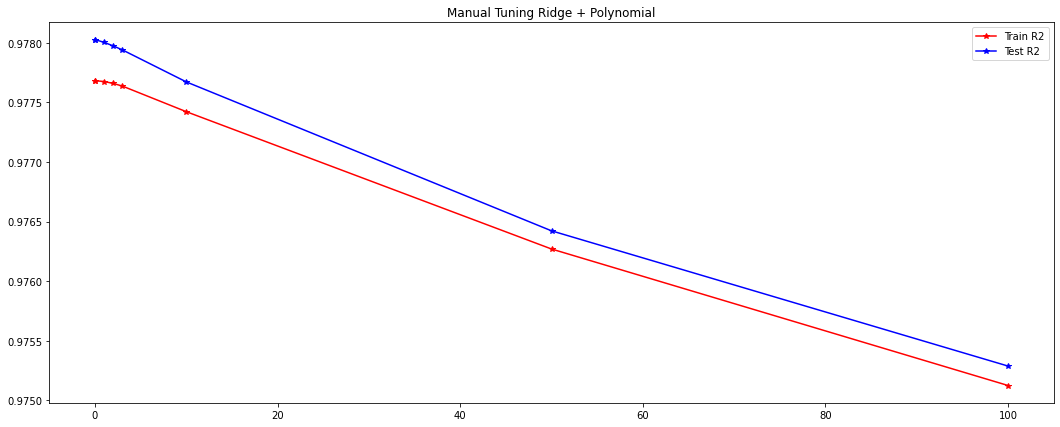

In [75]:
plt.figure(figsize=(18,7))
plt.plot(param_a, train_r, 'r*-')
plt.plot(param_a, test_r, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Ridge + Polynomial")
plt.show()

In [76]:
test_r # melihat hasil test r

[0.9780273592967961,
 0.9780271818040187,
 0.9780038104756748,
 0.9779743073728916,
 0.9779408834574636,
 0.9776721433970186,
 0.9764221087603447,
 0.9752868392375035]

In [77]:
np.max(test_r) # melihat paling tinggi nilai dari test ridge

0.9780273592967961

In [78]:
np.argmax(test_r) # Melihat pada index keberapa paling tinggi

0

In [79]:
# nilai tertinggi dari baris index
param_a[np.argmax(test_r)]

0.001

In [80]:
Alpha = np.arange(0, 0.002, 0.0001)

In [81]:
def Manual_Tune(Alpha, X_train, X_test, y_train, y_test, Model):
    train_r = []
    test_r = []
    
    for i in Alpha:
        model = Model(alpha=i)
        model.fit(X_train, y_train)
        y_pred_tr = model.predict(X_train)
        R2_train = r2_score(y_train, y_pred_tr)
        train_r.append(R2_train)
        y_pred_ts = model.predict(X_test)
        R2_test = r2_score(y_test, y_pred_ts)
        test_r.append(R2_test)
    return train_r, test_r

In [82]:
train_Ridge, test_Ridge = Manual_Tune(Alpha, df_XtrainPoli, df_XtestPoli, y_train, y_test, Ridge)

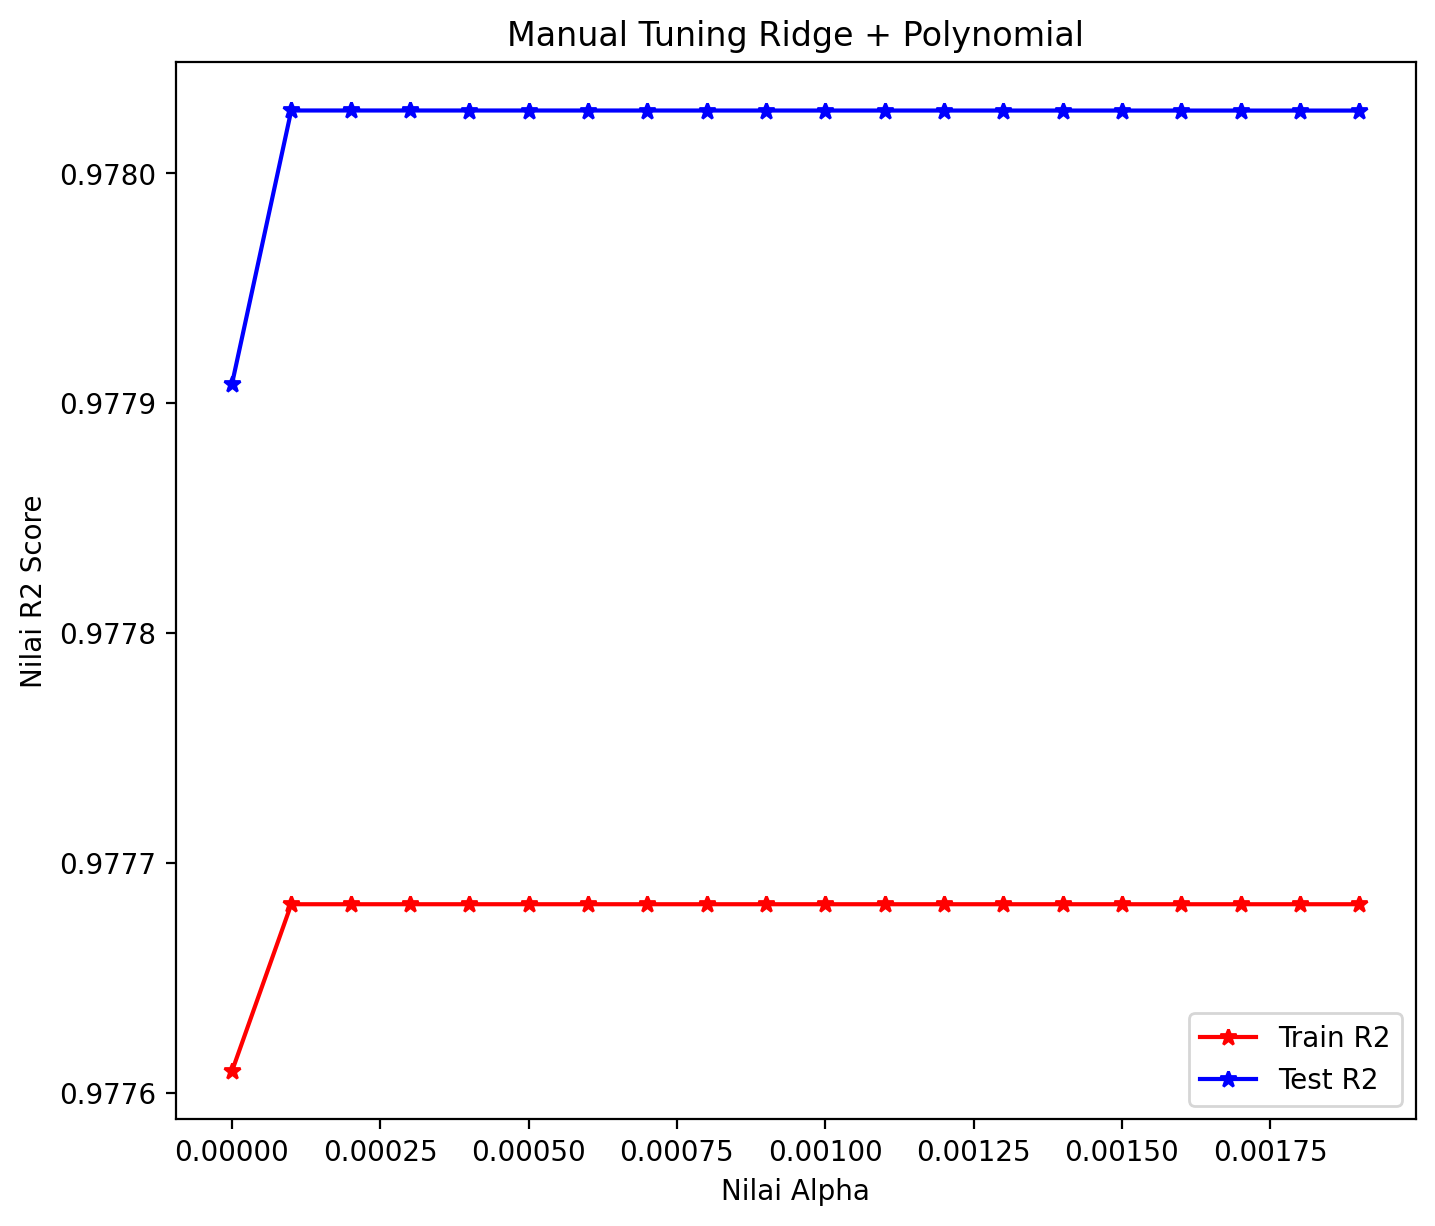

In [83]:
plt.figure(figsize=(8,7),dpi=200)
plt.plot(Alpha, train_Ridge, 'r*-')
plt.plot(Alpha, test_Ridge, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Ridge + Polynomial")
plt.xlabel("Nilai Alpha")
plt.ylabel("Nilai R2 Score")
plt.show()

# Tuning lasso

In [84]:
## Eva Matrix yang digunakan = R2
train_l = []
test_l = []

for i in param_a: # Melooping nilai dari pram_a
    lasso = Lasso(alpha=i) # Define model dengan nilai Alpha sesuai nilai i
    lasso.fit(df_XtrainPoli, y_train) # Training Model
    y_pred_tr = lasso.predict(df_XtrainPoli) # Model Predict data Training
    R2_train = r2_score(y_train, y_pred_tr) ## Evaluation Matrix Data Training
    train_l.append(R2_train) ## Memasukkan Hasil Eva Matrix Data Training ke Training List
    y_pred_ts = lasso.predict(df_XtestPoli) # Model Predict data Testing
    R2_test = r2_score(y_test, y_pred_ts) ## Evaluation Matrix Data Testing
    test_l.append(R2_test) ## Memasukkan Hasil Eva Matrix Data Testing ke Testing List

In [85]:
# melihat hasil test r
test_l

[0.978043269640518,
 0.9780432665584492,
 0.9780429273823104,
 0.9780426489526401,
 0.9780423379825948,
 0.9780387618077288,
 0.9780201168119701,
 0.9780223526825371]

In [86]:
# melihat paling tinggi nilai dari test ridge
np.max(test_l)

0.978043269640518

In [87]:
# Melihat pada index keberapa paling tinggi 
np.argmax(test_l)

0

In [88]:
param_a[np.argmax(test_l)]

0.001

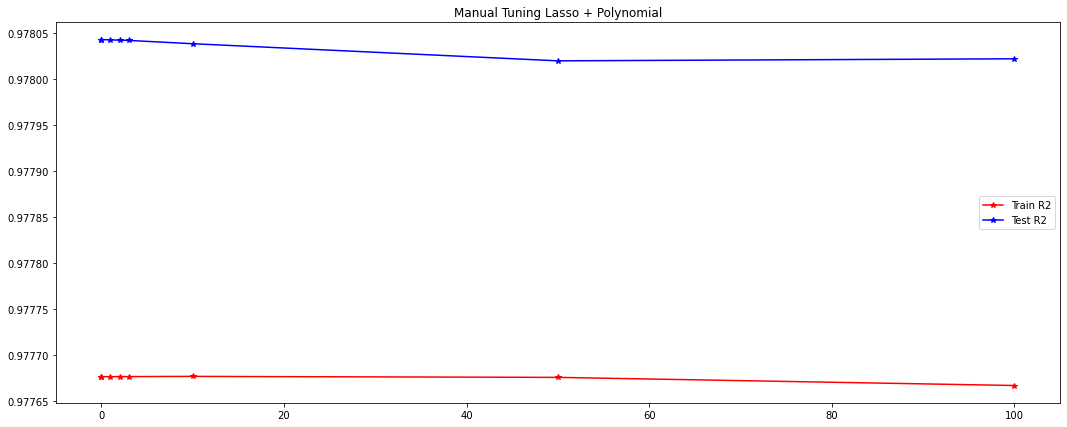

In [89]:
plt.figure(figsize=(18,7))
plt.plot(param_a, train_l, 'r*-')
plt.plot(param_a, test_l, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Lasso + Polynomial")
plt.show()

In [90]:
Alpha = np.arange(0, 0.002, 0.0001)

In [91]:
train_Lasso, test_Lasso = Manual_Tune(Alpha, df_XtrainPoli, df_XtestPoli, y_train, y_test, Lasso)

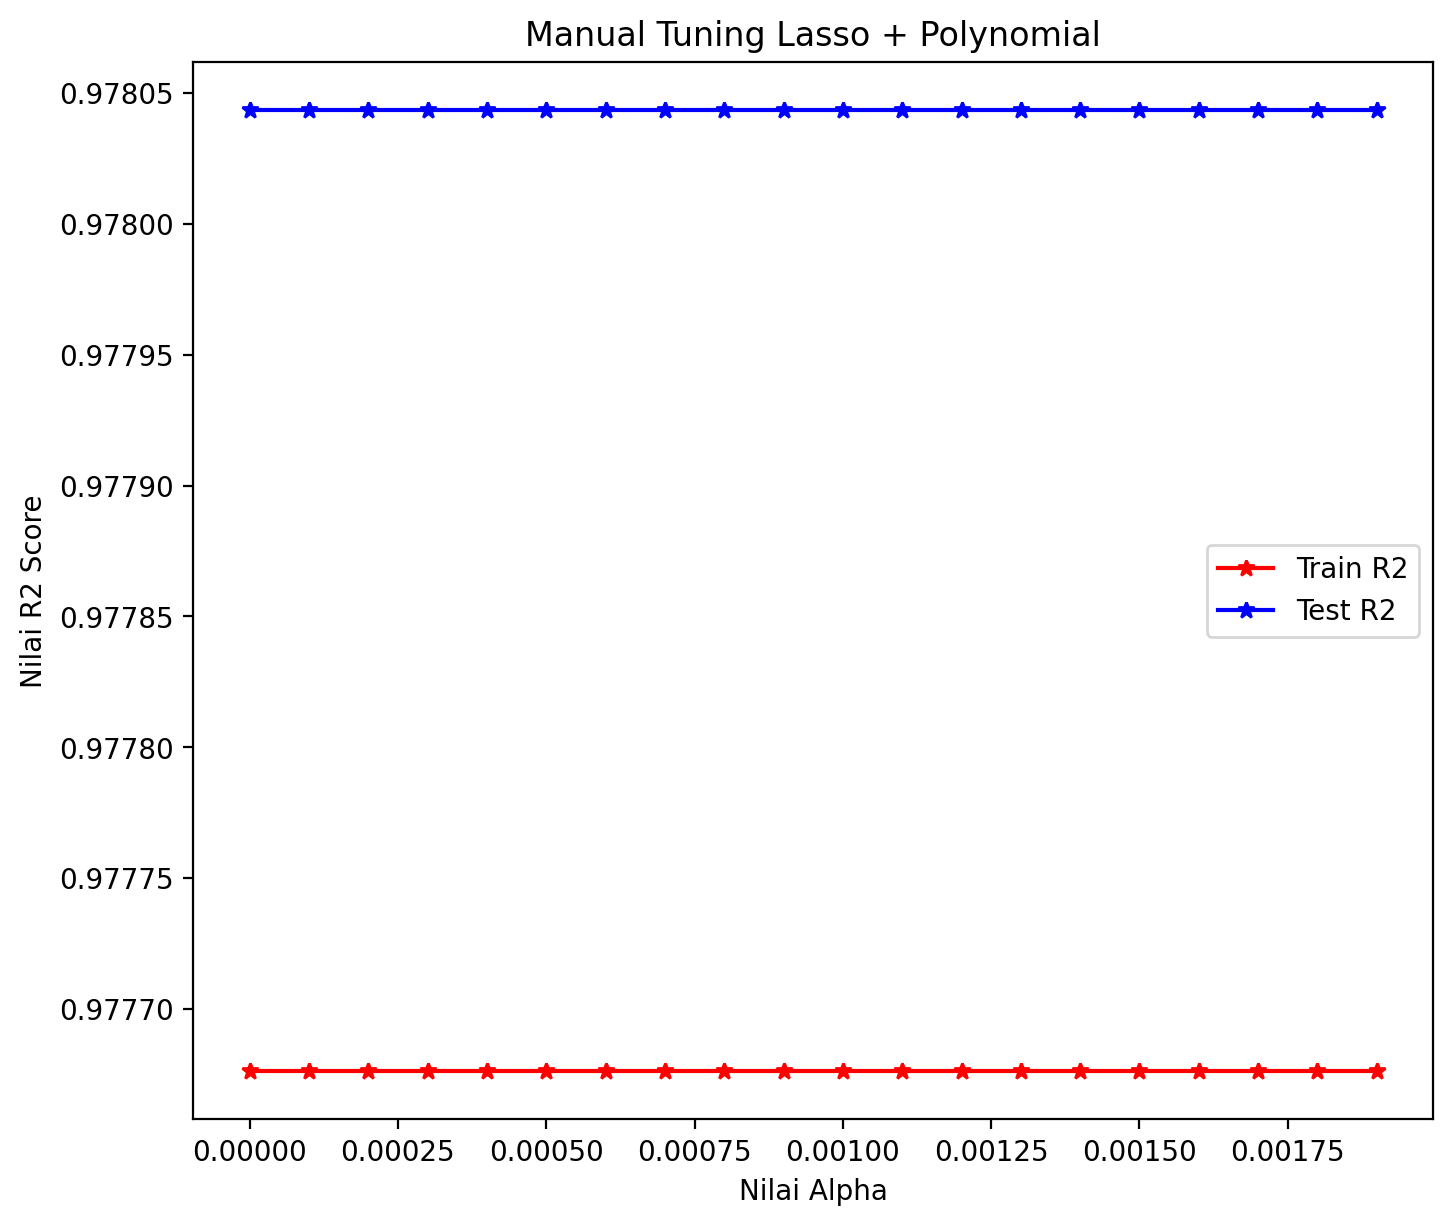

In [92]:
plt.figure(figsize=(8,7),dpi=200)
plt.plot(Alpha, train_Lasso, 'r*-')
plt.plot(Alpha, test_Lasso, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Lasso + Polynomial")
plt.xlabel("Nilai Alpha")
plt.ylabel("Nilai R2 Score")
plt.show()

# Tuning Elastic Net

In [93]:
## Eva Matrix yang digunakan = R2
train_e = []
test_e = []

for i in param_a: # Melooping nilai dari pram_a
    enet = ElasticNet(alpha=i) # Define model dengan nilai Alpha sesuai nilai i
    enet.fit(df_XtrainPoli, y_train) # Training Model
    y_pred_tr = enet.predict(df_XtrainPoli) # Model Predict data Training
    R2_train = r2_score(y_train, y_pred_tr) ## Evaluation Matrix Data Training
    train_e.append(R2_train) ## Memasukkan Hasil Eva Matrix Data Training ke Training List
    y_pred_ts = enet.predict(df_XtestPoli) # Model Predict data Testing
    R2_test = r2_score(y_test, y_pred_ts) ## Evaluation Matrix Data Testing
    test_e.append(R2_test) ## Memasukkan Hasil Eva Matrix Data Testing ke Testing List

In [94]:
# melihat hasil test r
test_e

[0.9779581887234224,
 0.977021776193718,
 0.9631507178258438,
 0.9614107171225373,
 0.9606739423178546,
 0.9593910964025344,
 0.9588380498392348,
 0.9587690921352069]

In [95]:
# melihat paling tinggi nilai dari test ridge
np.max(test_e)

0.9779581887234224

In [96]:
# Melihat pada index keberapa paling tinggi 
np.argmax(test_e)

0

In [97]:
param_a[np.argmax(test_e)]

0.001

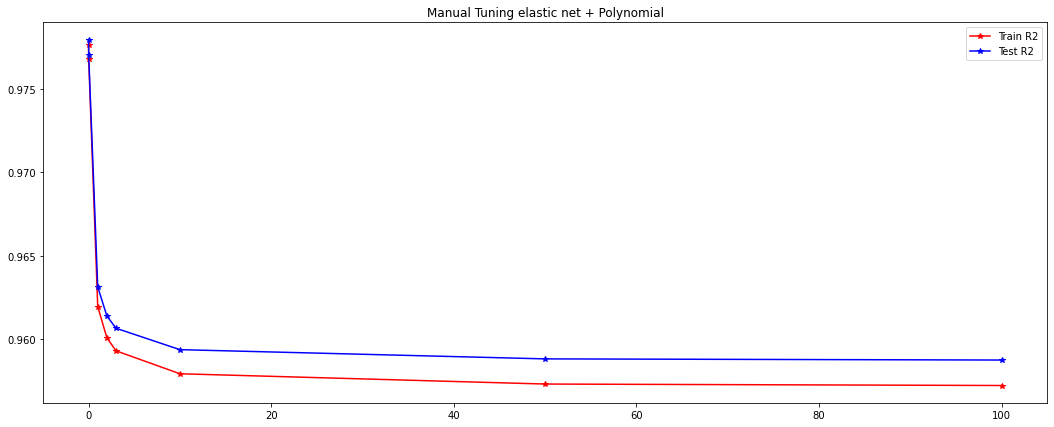

In [98]:
plt.figure(figsize=(18,7))
plt.plot(param_a, train_e, 'r*-')
plt.plot(param_a, test_e, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning elastic net + Polynomial")
plt.show()

In [99]:
Alpha = np.arange(0, 1, 0.1)

In [100]:
train_enet, test_enet = Manual_Tune(Alpha, df_XtrainPoli, df_XtestPoli, y_train, y_test, ElasticNet)

In [101]:
### Mengisi angka alpha di model

In [102]:
print('Top EvaMatrix Test Ridge : ', np.max(test_Ridge))
print('Top Alpha :', Alpha[np.argmax(test_Ridge)])

Top EvaMatrix Test Ridge :  0.9780273770060011
Top Alpha : 0.1


In [103]:
print('Top EvaMatrix Test Lasso : ', np.max(test_Lasso))
print('Top Alpha :', Alpha[np.argmax(test_Lasso)])

Top EvaMatrix Test Lasso :  0.9780432699836591
Top Alpha : 0.0


In [104]:
print('Top EvaMatrix Test Elastic Net : ', np.max(test_enet))
print('Top Alpha :', Alpha[np.argmax(test_enet)])

Top EvaMatrix Test Elastic Net :  0.9780432699836591
Top Alpha : 0.0


# Mengisi nilai value untuk tunning

In [105]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [106]:
Model_R_tuned = Ridge(alpha=0.0001)
Model_R_tuned.fit(df_XtrainPoli, y_train)

Ridge(alpha=0.0001)

In [107]:
model_l_tuned = Lasso(alpha=0)
model_l_tuned.fit(df_XtrainPoli, y_train)

Lasso(alpha=0)

In [108]:
model_e_tuned = ElasticNet(alpha=0)
model_e_tuned.fit(df_XtrainPoli, y_train)

ElasticNet(alpha=0)

- Ridge

In [109]:
r2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr = Eva_Matrix(Model_R_tuned, df_XtrainPoli, y_train)

In [110]:
r2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts = Eva_Matrix(Model_R_tuned, df_XtestPoli, y_test)

- lasso

In [111]:
r2_L_tr, MAE_L_tr, MSE_L_tr, RMSE_L_tr = Eva_Matrix(model_l_tuned, df_XtrainPoli, y_train)

In [112]:
r2_L_ts, MAE_L_ts, MSE_L_ts, RMSE_L_ts = Eva_Matrix(model_l_tuned, df_XtestPoli, y_test)

- Elastic Net

In [113]:
r2_E_tr, MAE_E_tr, MSE_E_tr, RMSE_E_tr = Eva_Matrix(model_e_tuned, df_XtrainPoli, y_train)

In [114]:
r2_E_ts, MAE_E_ts, MSE_E_ts, RMSE_E_ts = Eva_Matrix(model_e_tuned, df_XtestPoli, y_test)

In [115]:
eva_data_final = {
    "Ridge Tuned Training+ polinomial" : [r2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr],
    "Ridge Tuned Testing + polinomial" : [r2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts],
    "Lasso Tuned Training + polinomial" : [r2_L_tr, MAE_L_tr, MSE_L_tr, RMSE_L_tr],
    "Lasso Tuned Testing + polinomial" : [r2_L_ts, MAE_L_ts, MSE_L_ts, RMSE_L_ts],
    "ElasticNet Tuned Training + polinomial" : [r2_E_tr, MAE_E_tr, MSE_E_tr, RMSE_E_tr],
    "ElasticNet Tuned Testing + polinomial" : [r2_E_ts, MAE_E_ts, MSE_E_ts, RMSE_E_ts]
}
hasil_tuning = pd.DataFrame(eva_data_final, index=['R2', 'MAE', 'MSE', 'RMSE']).round(2)

In [116]:
data = {
    "Training LR" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "Testing LR" : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Polynomial Training' : [r2_PF, MAE_PF, MSE_PF, RMSE_PF],
    'Polynomial Testing' : [r2_PF_test, MAE_PF_test, MSE_PF_test, RMSE_PF_test],
    'Ridge Training' : [r2_train_R, mae_train_R, mse_train_R, rmse_train_R],
    'Ridge Testing' : [r2_test_R, mae_test_R, mse_test_R, rmse_test_R],
    'Lasso Training' : [r2_train_L, mae_train_L, mse_train_L, rmse_train_L],
    'Lasso Testing' : [r2_test_L, mae_test_L, mse_test_L, rmse_test_L],
    'Elastic Net Training' : [r2_train_E, mae_train_E, mse_train_E, rmse_train_E],
    'Elastic Net Testing' : [r2_test_E, mae_test_E, mse_test_E, rmse_test_E],
    'Ridge+Polinomial Training' : [r2_train_R_PF, mae_train_R_PF, mse_train_R_PF, rmse_train_R_PF],
    'Ridge+Polinomial Testing' : [r2_test_R_PF, mae_test_R_PF, mse_test_R_PF, rmse_test_R_PF],
    'Lasso+Polinomial Training' : [r2_train_L_PF, mae_train_L_PF, mse_train_L_PF, rmse_train_L_PF],
    'Lasso+Polinomial Testing' : [r2_test_L_PF, mae_test_L_PF, mse_test_L_PF, rmse_test_L_PF],
    'Elastic+ Polinomial Training' : [r2_train_E_PF, mae_train_E_PF, mse_train_E_PF, rmse_train_E_PF],
    'Elastic+Polinomial Testing' : [r2_test_E_PF, mae_test_E_PF, mse_test_E_PF, rmse_test_E_PF],
    "Ridge Tuned Training+ polinomial" : [r2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr],
    "Ridge Tuned Testing + polinomial" : [r2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts],
    "Lasso Tuned Training + polinomial" : [r2_L_tr, MAE_L_tr, MSE_L_tr, RMSE_L_tr],
    "Lasso Tuned Testing + polinomial" : [r2_L_ts, MAE_L_ts, MSE_L_ts, RMSE_L_ts],
    "ElasticNet Tuned Training + polinomial" : [r2_E_tr, MAE_E_tr, MSE_E_tr, RMSE_E_tr],
    "ElasticNet Tuned Testing + polinomial" : [r2_E_ts, MAE_E_ts, MSE_E_ts, RMSE_E_ts]
}

hasil = pd.DataFrame(data, index=["R Squared", "MAE", "MSE", "RMSE"]).T
hasil

,R Squared,MAE,MSE,RMSE
Training LR,0.932727,7.987454e+05,1.034323e+12,1.017017e+06
Testing LR,0.938284,7.995266e+05,1.027065e+12,1.013442e+06
Polynomial Training,0.977682,4.752952e+05,3.431394e+11,5.857810e+05
Polynomial Testing,0.978027,4.945552e+05,3.656674e+11,6.047044e+05
Ridge Training,0.932726,7.985848e+05,1.034340e+12,1.017025e+06
Ridge Testing,0.938246,7.995641e+05,1.027712e+12,1.013761e+06
Lasso Training,0.932727,7.987450e+05,1.034323e+12,1.017017e+06
Lasso Testing,0.938284,7.995268e+05,1.027067e+12,1.013443e+06
Elastic Net Training,0.671142,1.705073e+06,5.056205e+12,2.248601e+06
Elastic Net Testing,0.672799,1.754269e+06,5.445251e+12,2.333506e+06
